In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
from dishpylib.pyhelpers import make_outattr_metadata
from dishpylib.pyhelpers import print_runtime


In [3]:
print_runtime()


context: ci
hostname: d557dbea076d
interpreter: 3.8.12 (default, Sep 10 2021, 00:16:05)  [GCC 7.5.0]
notebook name: differentiation_complexity
notebook path: /opt/dishtiny/binder/bucket=prq49/a=all_stints_all_series_profiles+endeavor=16/differentiation_complexity.ipynb
revision: 6701829d8
timestamp: 2021-09-15T07:11:24Z00:00

IPython==7.16.1
packaging==20.9


<ipython-input-3-4d790cf6450f>:1: DeprecatedWarning: print_runtime is deprecated. use nbmetalog package instead
  print_runtime()


# get data


In [4]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/series-profiles/stage=8+what=elaborated/',
)


In [5]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2270,2277,2284,2285,2286,2287,2289,2290,2291,2292,2298,2299,2300,2301,2302,2308,2309,2310) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


'-4b8e8f9e4d8ca984'

In [6]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')


In [7]:
dfm10 = df[ df['Stint'] % 10 == 0 ]


# how does expression differentiation complexity change over time?


<ipython-input-8-176215e2c604>:15: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Stint-mod10+viz=lineplot+x=stint+y=number-unique-module-expression-profiles+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Stint-mod10+viz=lineplot+x=stint+y=number-unique-module-expression-profiles+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Number Unique Module Expression Profiles'>

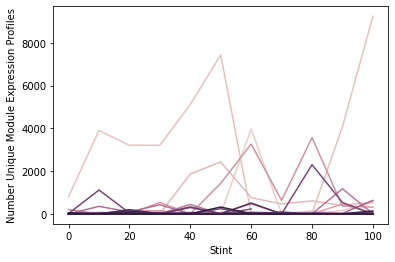

In [8]:
tp.tee(
    sns.lineplot,
    data=dfm10,
    x='Stint',
    y='Number Unique Module Expression Profiles',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-9-bb98bea9a463>:27: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  wa

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=semilog-swarmplot-boxplot+x=stint+y=number-unique-module-expression-profiles+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=semilog-swarmplot-boxplot+x=stint+y=number-unique-module-expression-profiles+ext=.png


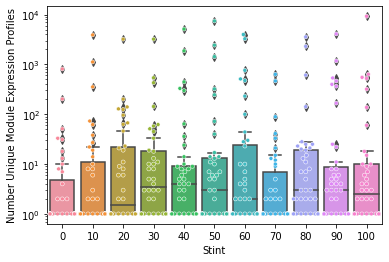

In [9]:
def semilog_swarmplot_boxplot(*args, **kwargs):
    plt.semilogy()
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    semilog_swarmplot_boxplot,
    data=dfm10,
    x='Stint',
    y='Number Unique Module Expression Profiles',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


# how does regulation differentiation complexity change over time?


<ipython-input-10-7b917ba5e310>:15: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Stint-mod10+viz=lineplot+x=stint+y=number-unique-module-regulation-profiles+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Stint-mod10+viz=lineplot+x=stint+y=number-unique-module-regulation-profiles+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Number Unique Module Regulation Profiles'>

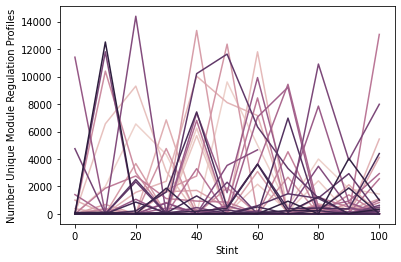

In [10]:
tp.tee(
    sns.lineplot,
    data=dfm10,
    x='Stint',
    y='Number Unique Module Regulation Profiles',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-11-d0151294db22>:27: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  w

teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=semilog-swarmplot-boxplot+x=stint+y=number-unique-module-regulation-profiles+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=semilog-swarmplot-boxplot+x=stint+y=number-unique-module-regulation-profiles+ext=.png


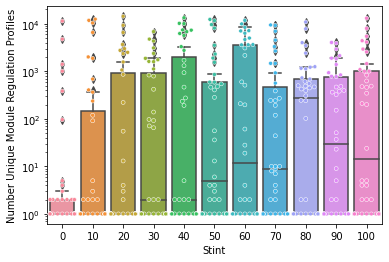

In [11]:
def semilog_swarmplot_boxplot(*args, **kwargs):
    plt.semilogy()
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    semilog_swarmplot_boxplot,
    data=dfm10,
    x='Stint',
    y='Number Unique Module Regulation Profiles',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


# how instruction execution intensity change over time?


<ipython-input-12-40d1b8706556>:15: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),


teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Stint-mod10+viz=lineplot+x=stint+y=num-instructions-executed-per-live-cardinal-update+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=filter-Stint-mod10+viz=lineplot+x=stint+y=num-instructions-executed-per-live-cardinal-update+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Num Instructions Executed per Live Cardinal-update'>

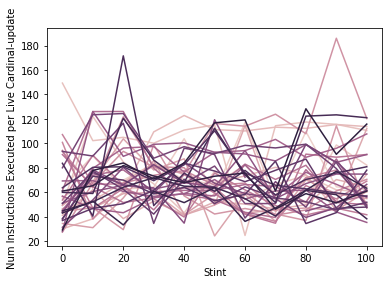

In [12]:
tp.tee(
    sns.lineplot,
    data=dfm10,
    x='Stint',
    y='Num Instructions Executed per Live Cardinal-update',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)


<ipython-input-13-638104f72a32>:26: DeprecatedWarning: make_outattr_metadata is deprecated. use nbmetalog package instead
  **make_outattr_metadata(),
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=swarmplot-boxplot+x=stint+y=num-instructions-executed-per-live-cardinal-update+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=filter-Stint-mod10+viz=swarmplot-boxplot+x=stint+y=num-instructions-executed-per-live-cardinal-update+ext=.png


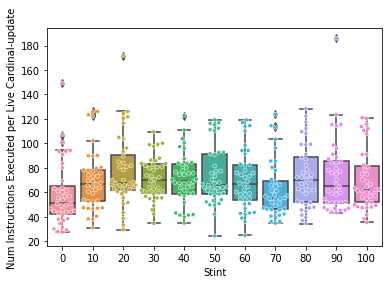

In [13]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tp.tee(
    swarmplot_boxplot,
    data=dfm10,
    x='Stint',
    y='Num Instructions Executed per Live Cardinal-update',
    teeplot_outattrs={
        **{
            'bucket' : ib.dub( df['Bucket'] ),
            'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
            'transform' : 'filter-Stint-mod10',
            '_dfdigest' : dfdigest,
        },
        **make_outattr_metadata(),
    },
)
